# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset didapat dari Kaggle berikut linknya : https://www.kaggle.com/datasets/neurocipher/heartdisease

   nama dataset : Heart Disease

   kegunaan umumnya : Pemodelan Prediktif untuk Deteksi Dini Penyakit Jantung
   
   Dataset “Heart Disease” oleh neurocipher di Kaggle adalah kumpulan data yang berisi informasi medis & gaya hidup klinis dari individu-individu yang digunakan untuk menganalisis dan memprediksi risiko penyakit jantung.

   terdapat : 270 data

   kolom yang tersedia :
   👤 Age – Age of the individual
   🚻 Sex – Gender (1 = male, 0 = female)
   ❤️‍🩹 ChestPainType – Type of chest pain
   🩸 RestingBP – Resting blood pressure
   🧪 Cholesterol – Serum cholesterol level
   🍬 FastingBS – Fasting blood sugar (1 = high, 0 = normal)
   🧷 RestingECG – ECG results at rest
   🏃‍♂️ MaxHR – Maximum heart rate achieved
   😣 ExerciseAngina – Angina induced by exercise
   📉 Oldpeak – ST depression from exercise
   📐 ST_Slope – Slope of the ST segment
   🎯 HeartDisease – Target variable (1 = disease, 0 = healthy)

Target kolom : Heart Disease (1 🟥 → Presence of heart disease, 0 🟩 → No heart disease)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [16]:
df = pd.read_csv(r"D:\SMSML_Tiara Diansyah Putri\Heart_Disease_Prediction_raw.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [18]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [19]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [20]:
df.duplicated().sum()

np.int64(0)

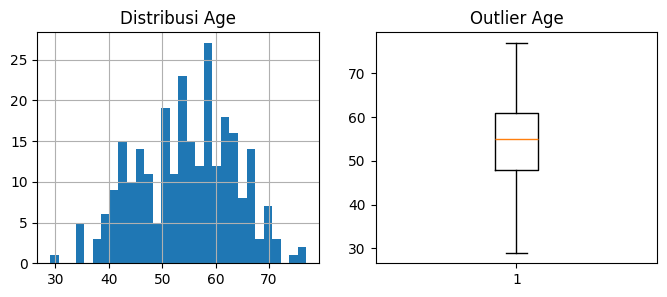

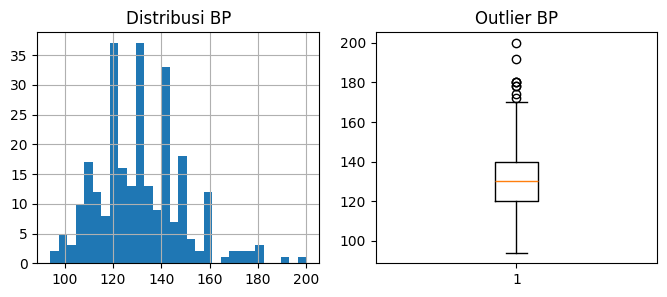

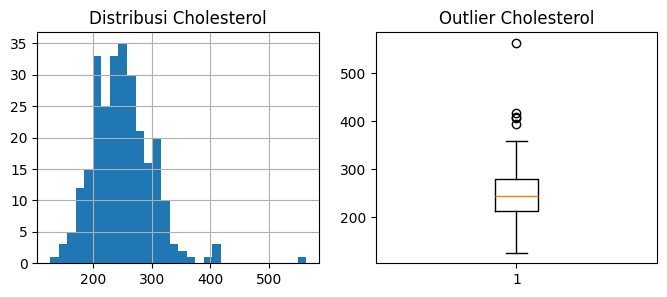

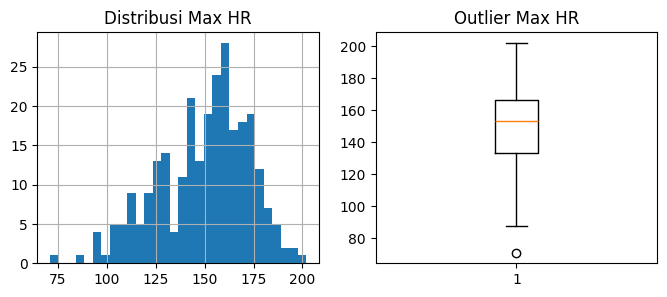

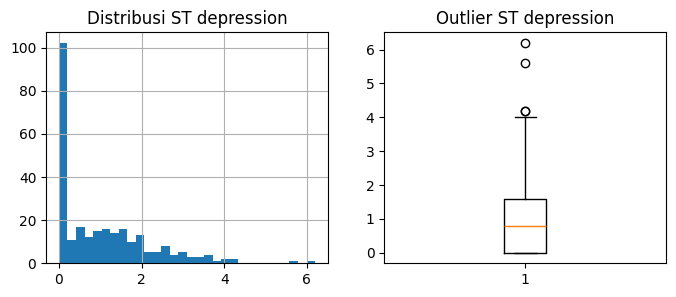

In [21]:
num_cols = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression'
]

for col in num_cols:
    plt.figure(figsize=(8,3))
    
    plt.subplot(1,2,1)
    df[col].hist(bins=30)
    plt.title(f'Distribusi {col}')
    
    plt.subplot(1,2,2)
    plt.boxplot(df[col])
    plt.title(f'Outlier {col}')
    
    plt.show()

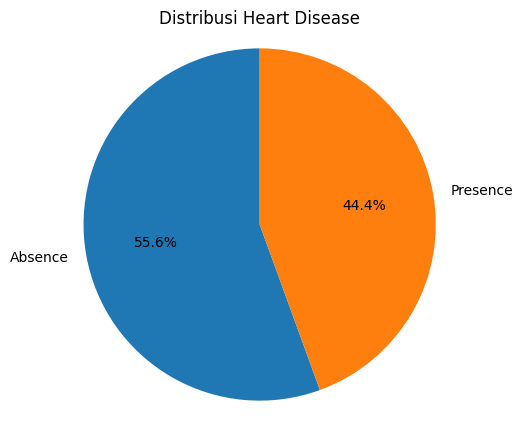

In [22]:
counts = df['Heart Disease'].value_counts()
counts

labels = counts.index
sizes = counts.values

plt.figure(figsize=(5,5))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribusi Heart Disease')
plt.axis('equal') 
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [23]:
Q1 = df['Cholesterol'].quantile(0.25)
Q3 = df['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['Cholesterol'] = df['Cholesterol'].clip(lower, upper)

In [24]:
df['Heart Disease'] = df['Heart Disease'].map({
    'Absence': 0,
    'Presence': 1
})

df.head(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322.0,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,380.5,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261.0,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263.0,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269.0,0,2,121,1,0.2,1,1,3,0


In [25]:
scaler = StandardScaler()
num_cols = [
    'Age',
    'BP',
    'Cholesterol',
    'Max HR',
    'ST depression'
]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [27]:
df.to_csv("Heart_Disease_Prediction_preprocessing.csv", index=False)